#  <center> Credit Default Analysis</center>
_Author: Michael Zaladonis_
## Predicting if customer will default

The purporse of this assignment to identify the model that most accurately predicts which borrows are most likely to default.

## Contents
1. [Introduction](#Introduction)
1. [Importing the Libraries](#importing)
2. [Read the data](#reading)
3. [Format Data](#data_fomatting)
4. [Explore Data](#data_exploration)
5. [EDA Observation](#eda_results)
6. <del>[Model Building](#build)</del>
7. <del>[Feature Importance](#feature_importance)</del>
8. <del>[Model Evaluation](#evaluate)</del>
9. <del>[Saving Model](#save_model)</del>
10. <del>[Meassuring Accuracy](#meassure_acc)</del>
11. <del>[Getting User Input](#user_input)</del>
12. <del>[Prediction for User Input](#pred_user_input)</del>
13. References



<a id="Introduction"></a>
#  Introduction
___
## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


<a id="Importing"></a>
## Import the Libraries

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="reading"></a>
## Read the data

In [83]:
credit = pd.read_csv('/Users/Michael/Documents/GitHub/C5T2/data/raw/credit.csv', header =0)

# Exploratory Analysis
___

In [37]:
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_BINNED,AGE_BINNED_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,2,2
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,2,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,4,4


In [38]:
credit.describe()

,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
ID                            30000 non-null category
LIMIT_BAL                     30000 non-null category
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6

In [39]:
credit.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
AGE_BINNED                    0
AGE_BINNED_CAT                0
dtype: int64

In [86]:
credit.SEX.unique()

array([2, 1])

In [87]:
credit["SEX"].describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

In [88]:
credit.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [89]:
credit["EDUCATION"].describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

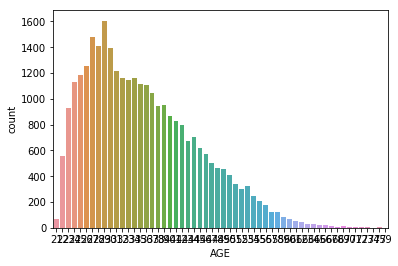

In [60]:
sns.countplot(x='AGE',data=credit)

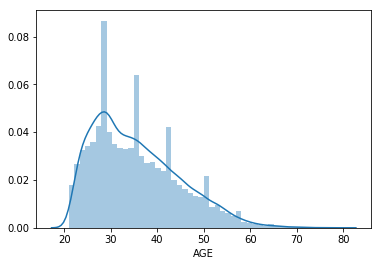

In [69]:
sns.distplot(credit['AGE'])

In [61]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ["1","2","3","4","5","6"]
credit['AGE_BINNED'] = pd.cut(credit['AGE'], bins=bins, labels=labels)

In [62]:
credit["defaulting"] = credit["default payment next month"]

credit["AGE_BINNED_CAT"].describe()

count     30000
unique        6
top           1
freq      11013
Name: AGE_BINNED_CAT, dtype: object

In [65]:
col_names = ["ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE", "defaulting"]

# loop to change each column to category type
for col in col_names:
    credit[col] = credit[col].astype('category',copy=False)
print("\nExample data changed to category type")


print(credit.dtypes)

# Cant use categorical data. 


Example data changed to category type
ID                            category
LIMIT_BAL                     category
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next mont

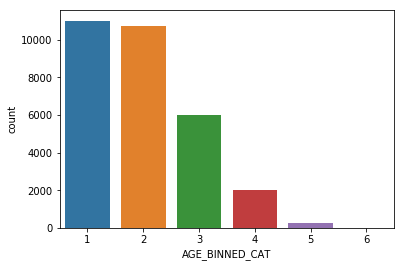

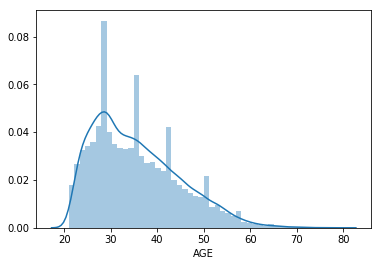

In [74]:
sns.distplot(credit['AGE']

In [49]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AGE_BINNED', 'AGE_BINNED_CAT',
       'defaulting', ''],
      dtype='object')


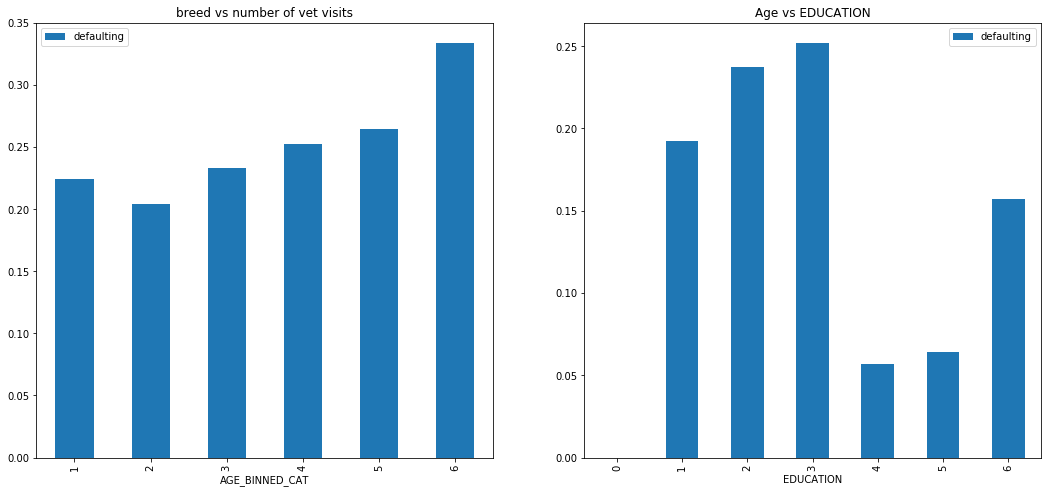

In [51]:
# PLotting Breeds vs Number of Vet Visits
# PLotting Breeds vs Weight
f,ax=plt.subplots(1,2,figsize=(18,8))
credit[['AGE_BINNED_CAT','defaulting']].groupby(['AGE_BINNED_CAT']).mean().plot.bar(ax=ax[0])
ax[0].set_title('breed vs number of vet visits')
credit[['EDUCATION','defaulting']].groupby(['EDUCATION']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Age vs EDUCATION')
plt.show()


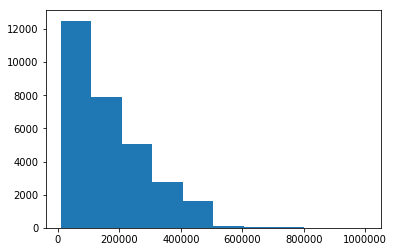

In [23]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

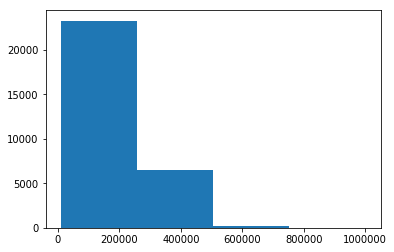

In [32]:
plt.hist(credit['LIMIT_BAL'], bins=4)

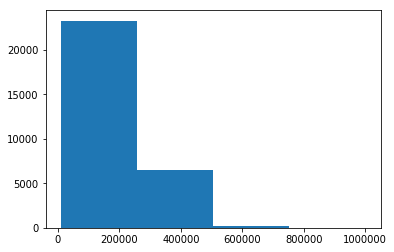

In [34]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

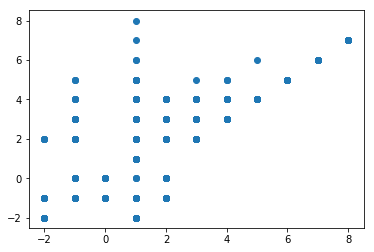

In [26]:
x = credit['PAY_0']
y = credit['PAY_2']

# 2. Next, we can use matplotlib to create the scatter plot using the two variables for the X and Y axes as follows:

plt.scatter(x,y)
plt.show()

In [27]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AGE_BINNED', 'AGE_BINNED_CAT'],
      dtype='object')


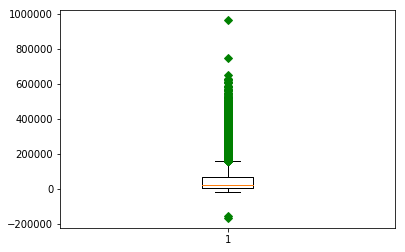

In [28]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [29]:
corrMat = credit.corr()
print(corrMat)

                                 AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
AGE                         1.000000 -0.039447 -0.050148 -0.053048 -0.049722   
PAY_0                      -0.039447  1.000000  0.672164  0.574245  0.538841   
PAY_2                      -0.050148  0.672164  1.000000  0.766552  0.662067   
PAY_3                      -0.053048  0.574245  0.766552  1.000000  0.777359   
PAY_4                      -0.049722  0.538841  0.662067  0.777359  1.000000   
PAY_5                      -0.053826  0.509426  0.622780  0.686775  0.819835   
PAY_6                      -0.048773  0.474553  0.575501  0.632684  0.716449   
BILL_AMT1                   0.056239  0.187068  0.234887  0.208473  0.202812   
BILL_AMT2                   0.054283  0.189859  0.235257  0.237295  0.225816   
BILL_AMT3                   0.053710  0.179785  0.224146  0.227494  0.244983   
BILL_AMT4                   0.051353  0.179125  0.222237  0.227202  0.245917   
BILL_AMT5                   0.049345  0.

In [30]:
covMat = credit.cov()
print(covMat)

                                     AGE         PAY_0         PAY_2  \
AGE                            84.969755     -0.408639     -0.553408   
PAY_0                          -0.408639      1.262930      0.904330   
PAY_2                          -0.553408      0.904330      1.433254   
PAY_3                          -0.585263      0.772384      1.098371   
PAY_4                          -0.535851      0.707972      0.926680   
PAY_5                          -0.562245      0.648743      0.844886   
PAY_6                          -0.517022      0.613292      0.792320   
BILL_AMT1                   38172.933546  15480.304170  20706.614217   
BILL_AMT2                   35613.657962  15185.916919  20045.829482   
BILL_AMT3                   34334.251320  14011.556537  18609.510991   
BILL_AMT4                   30453.108180  12950.248389  17116.298983   
BILL_AMT5                   27654.067800  12341.668685  16110.952468   
BILL_AMT6                   26137.648547  11844.759724  15642.87

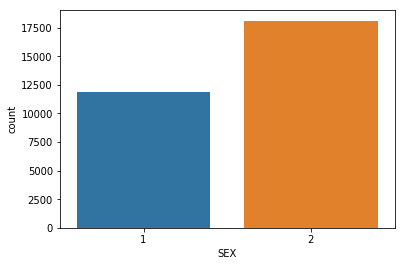

In [18]:
sns.countplot(x='SEX',data=credit)

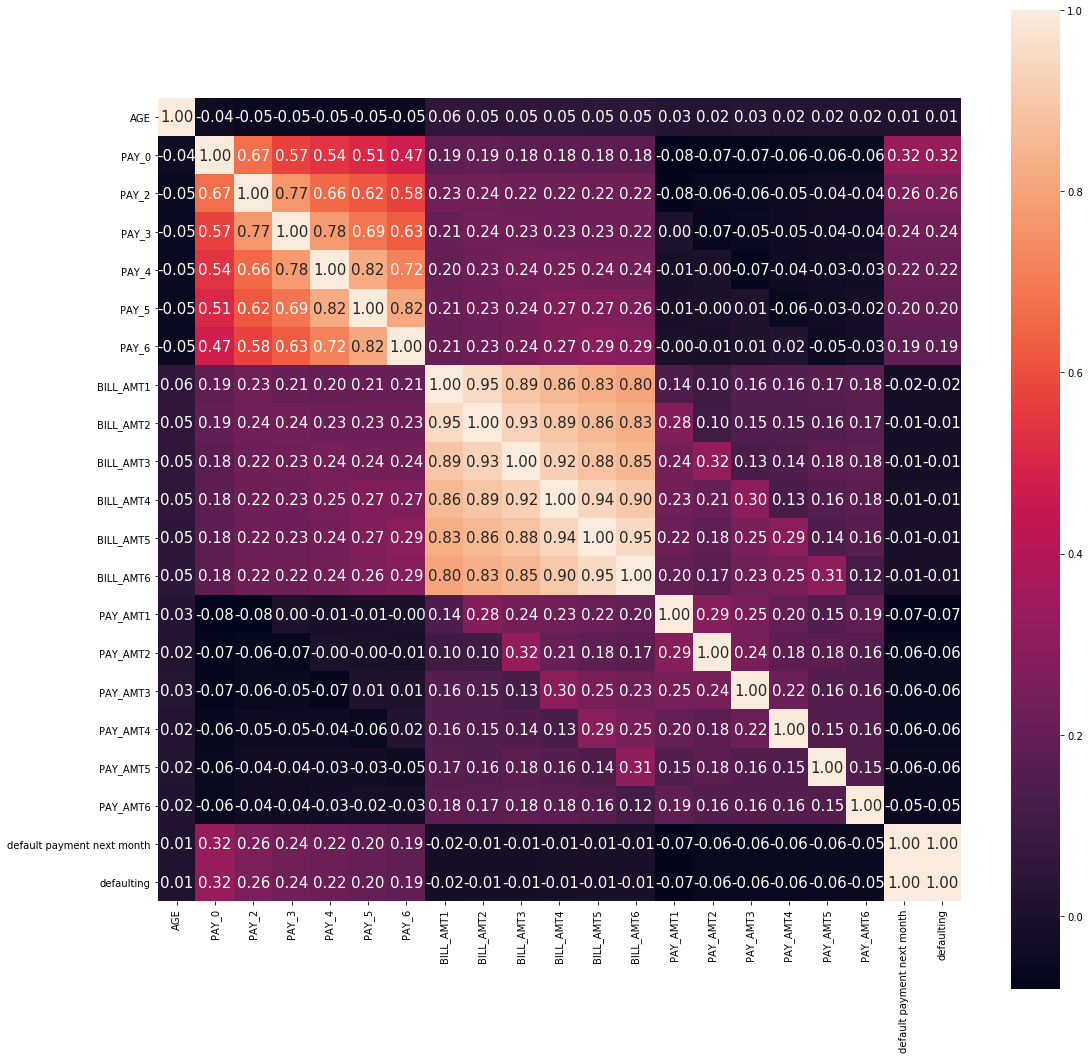

In [54]:
corr=credit.corr()
corr = (corr)
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.plt.title('Heatmap of Correlation Matrix')

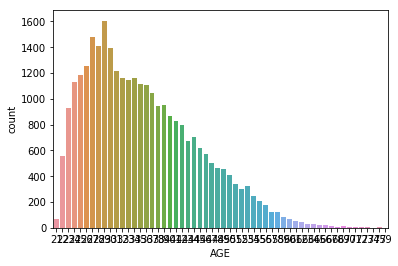

In [58]:
sns.countplot(x='AGE',data=credit)


# Load data

# Prepare User Data


# Output Results

In [95]:
usersusers..to_csvto_csv(('data/2017/users.csv''data/20 , index=False)
repos_users.to_csv('data/2017/repos-users-geocodes.csv', index=False)
repos_users.to_csv('data/2017/repos-users.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-95-c73bc64ac9b3>, line 1)

<a id="References"></a>
# References
___

1. f
